In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


cancellation_log_file = 'C:/Users/matey/Downloads/Aditi_CBH_2/cancel_logs.csv'
shift_claims_log_file = 'C:/Users/matey/Downloads/Aditi_CBH_2/booking_logs.csv'
shift_log_file = 'C:/Users/matey/Downloads/Aditi_CBH_2/cleveland_shifts.csv'


cancellation_df = pd.read_csv(cancellation_log_file)
shift_df = pd.read_csv(shift_log_file)
shift_claims_df = pd.read_csv(shift_claims_log_file)
cancellation_df = cancellation_df.drop(columns=['ID'])
shift_claims_df = shift_claims_df.drop(columns=['ID'])
shift_df = shift_df.rename(columns={'ID': 'Shift ID'})
shift_df = shift_df.rename(columns={'Agent ID': 'Worker ID'})

In [13]:
# Extract column names for each DataFrame
cancellation_headings = list(cancellation_df.columns)
shift_headings = list(shift_df.columns)
shift_claims_headings = list(shift_claims_df.columns)

# Print the column names
print("Cancellation Log Column Names:", cancellation_headings)
print("Shift Log Column Names:", shift_headings)
print("Shift Claims Log Column Names:", shift_claims_headings)


Cancellation Log Column Names: ['Created At', 'Shift ID', 'Action', 'Worker ID', 'Shift Start Logs', 'Facility ID', 'Lead Time']
Shift Log Column Names: ['Shift ID', 'Worker ID', 'Facility ID', 'Start', 'Agent Req', 'End', 'Deleted', 'Shift Type', 'Created At', 'Verified', 'Charge', 'Time']
Shift Claims Log Column Names: ['Created At', 'Shift ID', 'Action', 'Worker ID', 'Facility ID', 'Lead Time']


In [14]:
# Sub-DataFrame for Action type 1 (replace 'Action_Type_1' with the actual value)
action_type_1_df = cancellation_df[cancellation_df['Action'] == 'NO_CALL_NO_SHOW']

# Sub-DataFrame for Action type 2 (replace 'Action_Type_2' with the actual value)
action_type_2_df = cancellation_df[cancellation_df['Action'] == 'WORKER_CANCEL']

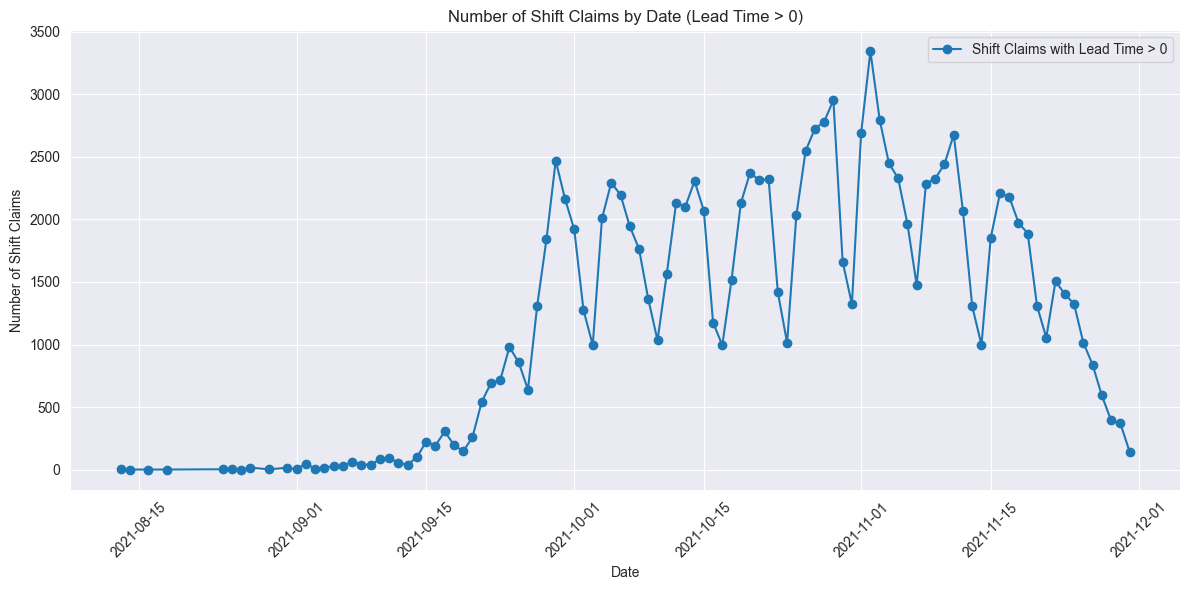

In [25]:
# Creating a copy of the filtered DataFrame to avoid SettingWithCopyWarning
shift_claims_df = shift_claims_df.copy()

# Filter rows where 'Lead Time' > 0
filtered_shift_claims_df = shift_claims_df[shift_claims_df['Lead Time'] > 0].copy()

# Convert 'Created At' to datetime and extract dates
filtered_shift_claims_df['Date'] = pd.to_datetime(filtered_shift_claims_df['Created At']).dt.date

# Group by date and count shift claims
shift_claims_counts = filtered_shift_claims_df.groupby('Date').size()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(shift_claims_counts.index, shift_claims_counts.values, marker='o', label='Shift Claims with Lead Time > 0')

# Customizing the plot
plt.title('Number of Shift Claims by Date (Lead Time > 0)')
plt.xlabel('Date')
plt.ylabel('Number of Shift Claims')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()




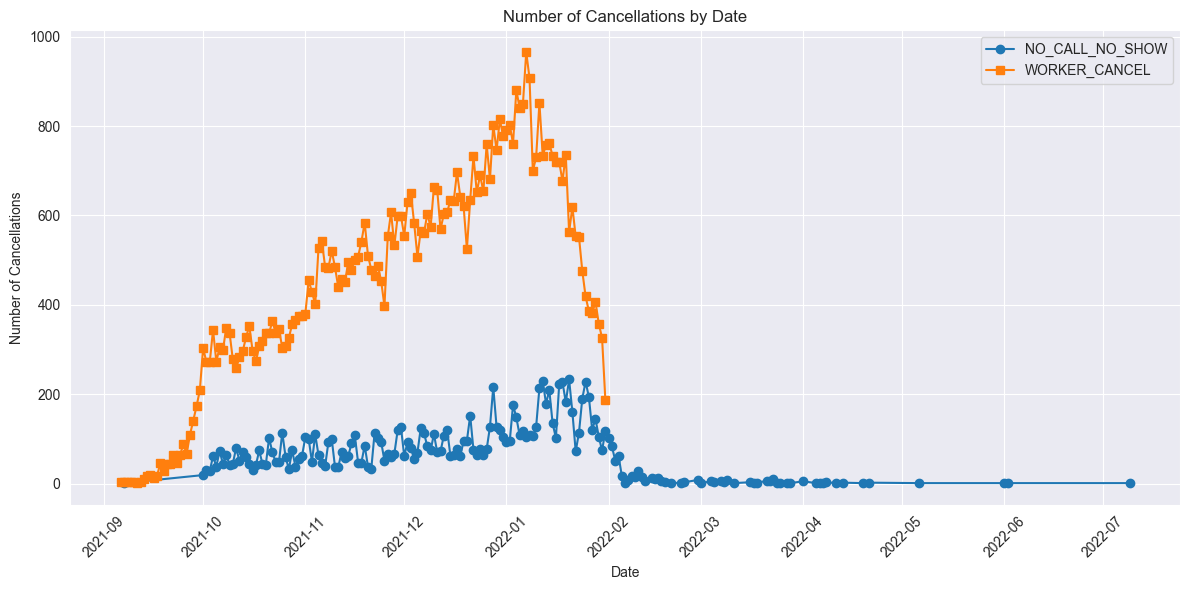

In [23]:
# Creating a copy of the filtered DataFrame to avoid SettingWithCopyWarning
action_type_1_df = action_type_1_df.copy()
action_type_2_df = action_type_2_df.copy()

# Convert 'Created At' to datetime and extract dates
action_type_1_df.loc[:, 'Date'] = pd.to_datetime(action_type_1_df['Created At']).dt.date
action_type_2_df.loc[:, 'Date'] = pd.to_datetime(action_type_2_df['Created At']).dt.date

# Group by date and count cancellations
action_type_1_counts = action_type_1_df.groupby('Date').size()
action_type_2_counts = action_type_2_df.groupby('Date').size()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(action_type_1_counts.index, action_type_1_counts.values, marker='o', label='NO_CALL_NO_SHOW')
plt.plot(action_type_2_counts.index, action_type_2_counts.values, marker='s', label='WORKER_CANCEL')

# Customizing the plot
plt.title('Number of Cancellations by Date')
plt.xlabel('Date')
plt.ylabel('Number of Cancellations')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


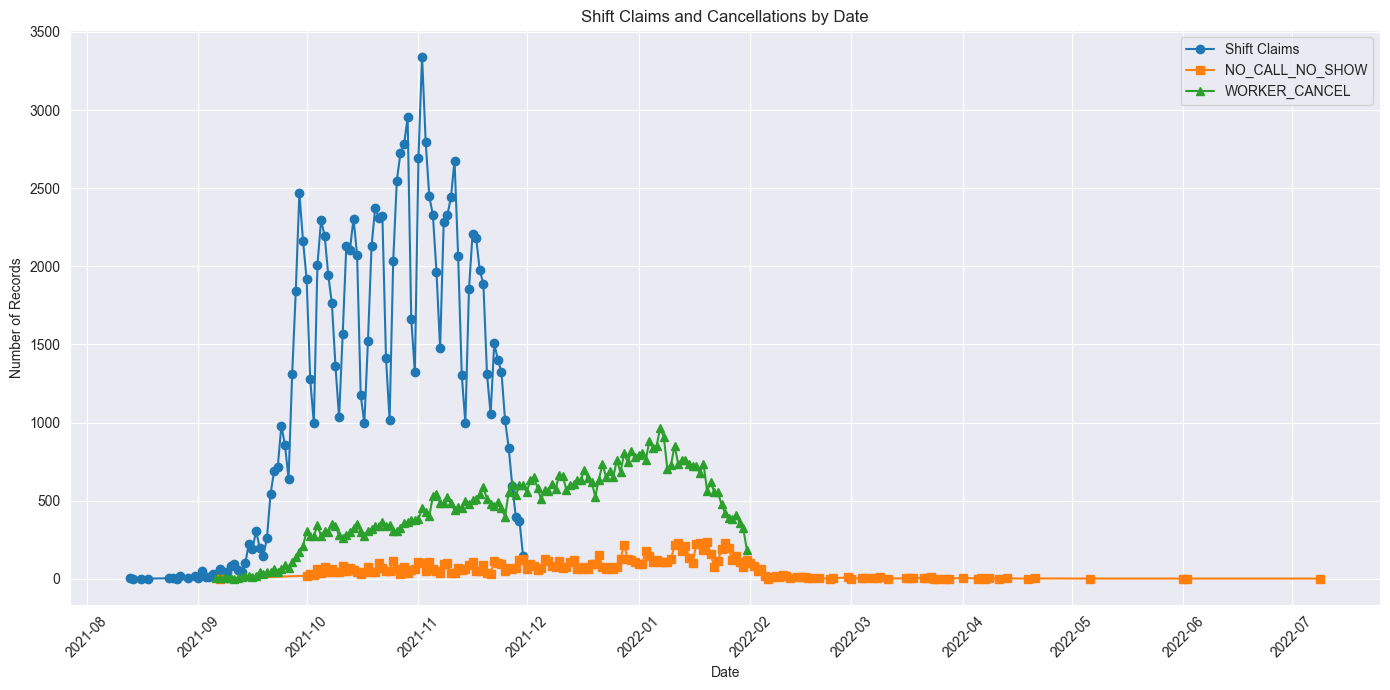

In [26]:
# Combine shift claims and cancellations into a single plot for comparison

# Create the plot
plt.figure(figsize=(14, 7))

# Plot Shift Claims
plt.plot(shift_claims_counts.index, shift_claims_counts.values, marker='o', label='Shift Claims')

# Plot NO_CALL_NO_SHOW cancellations
plt.plot(action_type_1_counts.index, action_type_1_counts.values, marker='s', label='NO_CALL_NO_SHOW')

# Plot WORKER_CANCEL cancellations
plt.plot(action_type_2_counts.index, action_type_2_counts.values, marker='^', label='WORKER_CANCEL')

# Customizing the plot
plt.title('Shift Claims and Cancellations by Date')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the combined plot
plt.show()


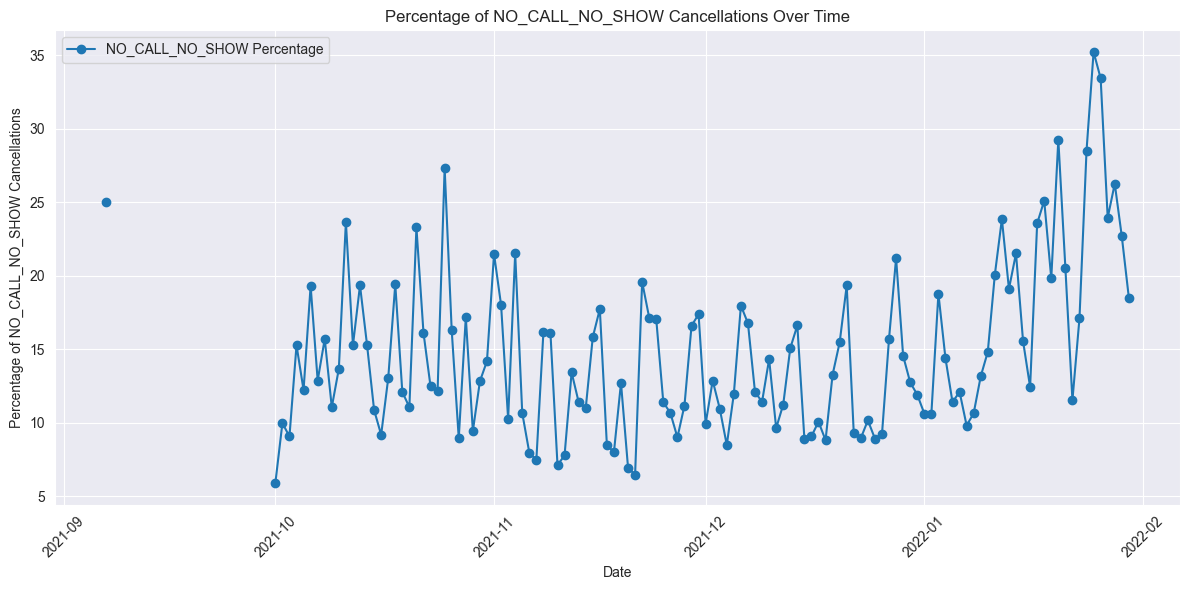

In [29]:
# Filter data to include only records up to February 2022
filtered_cancellation_df = cancellation_df[pd.to_datetime(cancellation_df['Created At']) <= pd.Timestamp('2022-01-31')]

# Filter NO_CALL_NO_SHOW cancellations within this time range
no_call_no_show_df = filtered_cancellation_df[filtered_cancellation_df['Action'] == 'NO_CALL_NO_SHOW'].copy()

# Extract dates from 'Created At' and add as a new column
filtered_cancellation_df.loc[:, 'Date'] = pd.to_datetime(filtered_cancellation_df['Created At']).dt.date
no_call_no_show_df.loc[:, 'Date'] = pd.to_datetime(no_call_no_show_df['Created At']).dt.date

# Calculate total cancellations per date
total_cancellations_per_date = filtered_cancellation_df.groupby('Date').size()

# Calculate NO_CALL_NO_SHOW cancellations per date
no_call_no_show_per_date = no_call_no_show_df.groupby('Date').size()

# Calculate percentage of NO_CALL_NO_SHOW cancellations
cancellation_percentage = (no_call_no_show_per_date / total_cancellations_per_date) * 100

# Plot the NO_CALL_NO_SHOW percentage over time
plt.figure(figsize=(12, 6))
plt.plot(cancellation_percentage.index, cancellation_percentage.values, marker='o', label='NO_CALL_NO_SHOW Percentage')

# Customize the plot
plt.title('Percentage of NO_CALL_NO_SHOW Cancellations Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of NO_CALL_NO_SHOW Cancellations')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


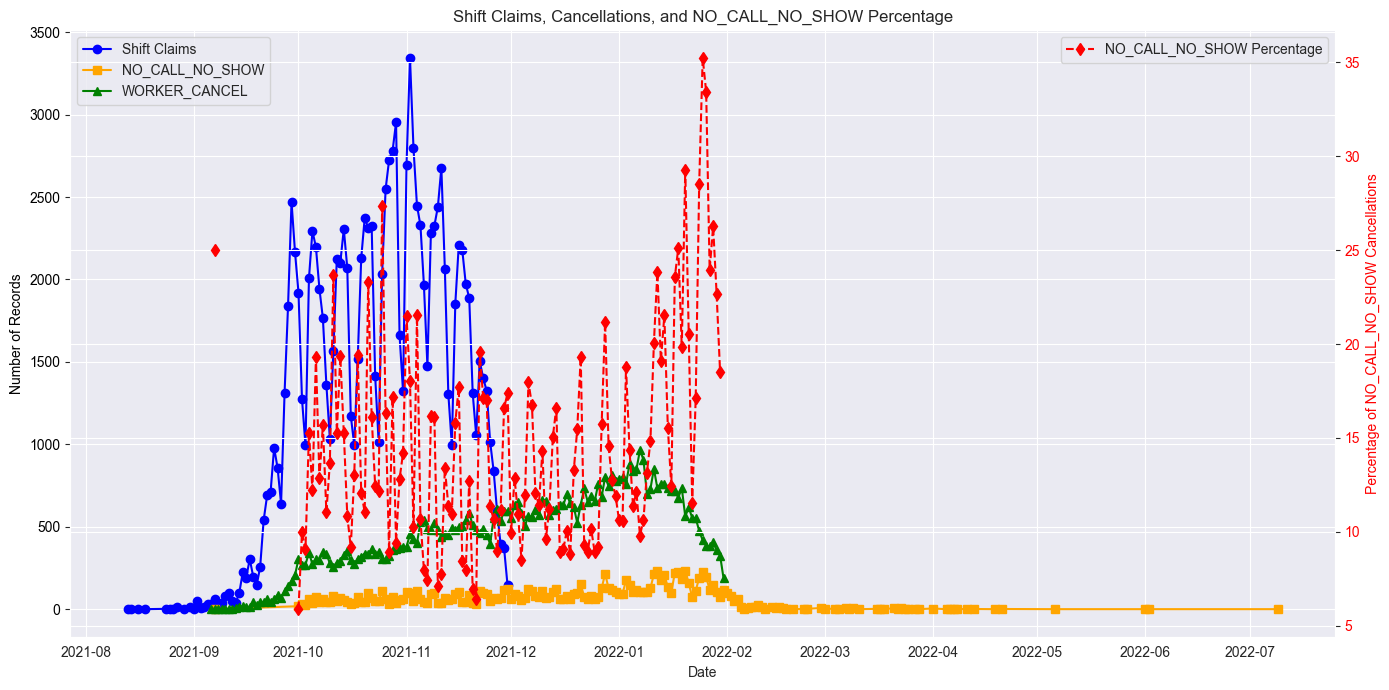

In [30]:
# Create a combined plot with a separate axis for NO_CALL_NO_SHOW percentage
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Shift Claims on the first axis
ax1.plot(shift_claims_counts.index, shift_claims_counts.values, marker='o', label='Shift Claims', color='blue')
ax1.plot(action_type_1_counts.index, action_type_1_counts.values, marker='s', label='NO_CALL_NO_SHOW', color='orange')
ax1.plot(action_type_2_counts.index, action_type_2_counts.values, marker='^', label='WORKER_CANCEL', color='green')

# Set labels and grid for the first axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Records', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis for NO_CALL_NO_SHOW percentage
ax2 = ax1.twinx()
ax2.plot(cancellation_percentage.index, cancellation_percentage.values, marker='d', label='NO_CALL_NO_SHOW Percentage', color='red', linestyle='--')

# Set labels and grid for the second axis
ax2.set_ylabel('Percentage of NO_CALL_NO_SHOW Cancellations', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Set the title
plt.title('Shift Claims, Cancellations, and NO_CALL_NO_SHOW Percentage')

# Adjust the layout and show the plot
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


Lead Time Metrics for WORKER_CANCEL


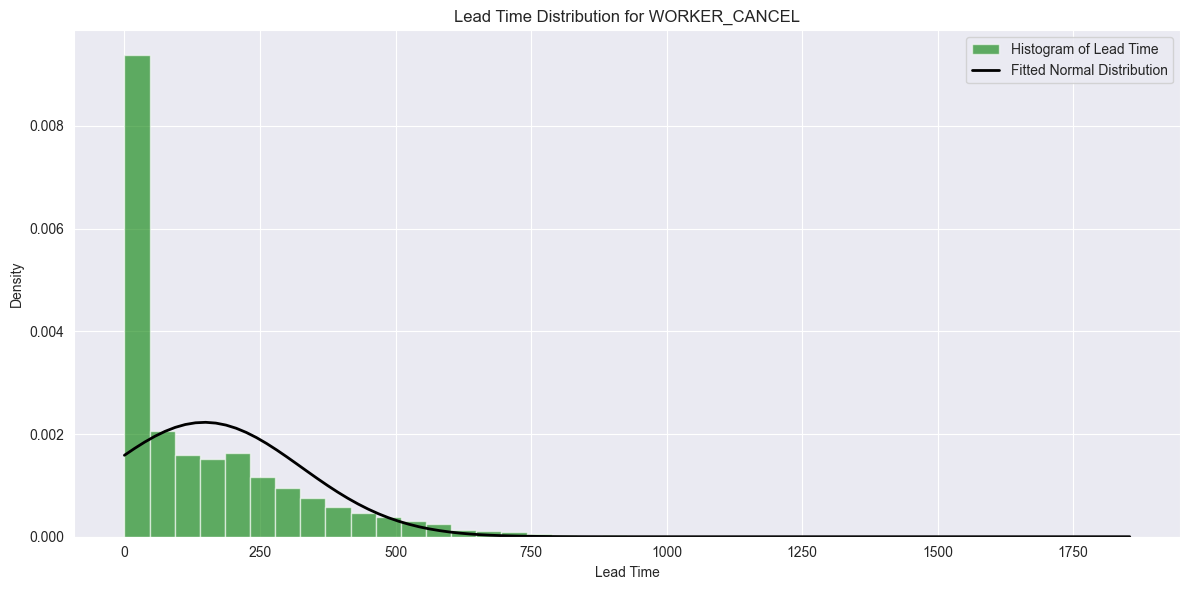

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Ensure action_type_2_df is defined
# Filter Lead Time data for WORKER_CANCEL
lead_time_data = action_type_2_df['Lead Time'].dropna()  # Drop NaN values for accurate statistics

# Calculate mean, standard deviation, and median
mean_lead_time = np.mean(lead_time_data)
std_lead_time = np.std(lead_time_data)
median_lead_time = np.median(lead_time_data)

# Calculate other percentiles
percentiles = np.percentile(lead_time_data, [5, 25, 50, 75, 95])

# Fit a normal distribution to the Lead Time data
mu, sigma = norm.fit(lead_time_data)

# Display metrics
metrics = {
    "Mean": mean_lead_time,
    "Standard Deviation": std_lead_time,
    "Median": median_lead_time,
    "5th Percentile": percentiles[0],
    "25th Percentile": percentiles[1],
    "50th Percentile (Median)": percentiles[2],
    "75th Percentile": percentiles[3],
    "95th Percentile": percentiles[4],
    "Fitted Normal Distribution Mean (mu)": mu,
    "Fitted Normal Distribution Std (sigma)": sigma
}

# Convert metrics to DataFrame for display
import pandas as pd
metrics_df = pd.DataFrame(metrics, index=[0])
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Lead Time Metrics for WORKER_CANCEL", dataframe=metrics_df)

# Plot the histogram and fitted normal distribution
plt.figure(figsize=(12, 6))
count, bins, _ = plt.hist(lead_time_data, bins=40, density=True, alpha=0.6, color='g', label='Histogram of Lead Time')

# Plot the normal distribution fit
x = np.linspace(min(lead_time_data), max(lead_time_data), 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

# Customize the plot
plt.title('Lead Time Distribution for WORKER_CANCEL')
plt.xlabel('Lead Time')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


Above plot backs that the current hours tiers for cancellation would work: Median is 77 hours and 5th Percentile 1 hour - would suggest it to be made 8 hours as for 25th percentile data.
So new tiers could be: > 72 hours, 8-72 hours and < 8 hours
So the current policy is helpful and we can also continue with it. > 72 hours, 4-72 hours and < 4 hours

{'Mean': 147.6377231399528,
 'Standard Deviation': 179.06704270354763,
 'Median': 77.28222249999999,
 '5th Percentile': 0.9243612500000002,
 '25th Percentile': 8.11208325,
 '50th Percentile (Median)': 77.28222249999999,
 '75th Percentile': 231.6163195,
 '95th Percentile': 510.6772363,
 'Fitted Normal Distribution Mean (mu)': 147.6377231399528,
 'Fitted Normal Distribution Std (sigma)': 179.06704270354763}

In [46]:
# Group the data by 'Verified' and describe the 'Charge' column
charge_analysis = shift_df.groupby('Verified')['Charge'].describe()

# Display the analysis
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Charge Analysis by Verified Status", dataframe=charge_analysis)


Charge Analysis by Verified Status


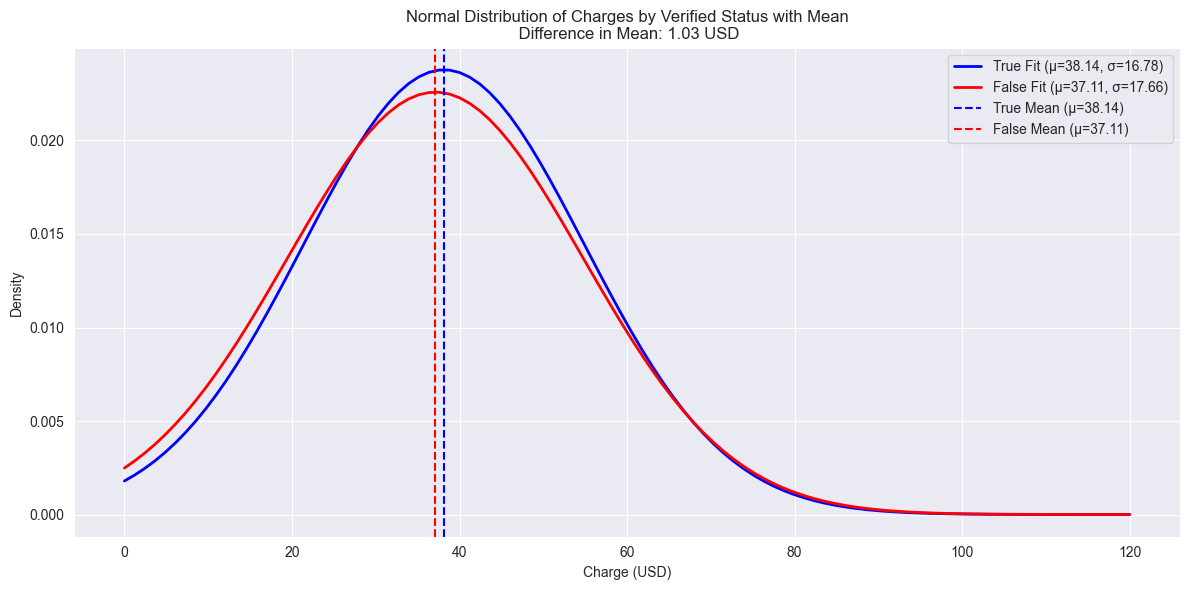

In [66]:
# Replace NaN values in 'Deleted' and cast the column to bool
shift_df['Deleted'] = shift_df['Deleted'].fillna(False).astype(bool)

# Filter data for Verified = False 
verified_false_filtered = shift_df[(shift_df['Verified'] == False) & (shift_df['Deleted'] == False) | (shift_df['Agent Req'] == 'CNA') | (shift_df['Agent Req'] == 'RN') | (shift_df['Agent Req'] == 'LVN')]['Charge'].dropna()
#& (shift_df['Deleted'] == False)]['Charge'].dropna()

# Filter data for Verified = True (unchanged)
verified_true_filtered = shift_df[(shift_df['Verified'] == True) | (shift_df['Agent Req'] == 'CNA') | (shift_df['Agent Req'] == 'RN') | (shift_df['Agent Req'] == 'LVN')]['Charge'].dropna()

# Fit normal distributions
mu_true, sigma_true = norm.fit(verified_true_filtered)
mu_false, sigma_false = norm.fit(verified_false_filtered)

# Generate x values for plotting
x_true = np.linspace(verified_true_filtered.min(), verified_true_filtered.max(), 100)
x_false = np.linspace(verified_false_filtered.min(), verified_false_filtered.max(), 100)

# Generate normal distribution curves
pdf_true = norm.pdf(x_true, mu_true, sigma_true)
pdf_false = norm.pdf(x_false, mu_false, sigma_false)

# Plot the histogram and normal distribution curves
plt.figure(figsize=(12, 6))

# Plot the normal distribution curves
plt.plot(x_true, pdf_true, label=f'True Fit (μ={mu_true:.2f}, σ={sigma_true:.2f})', color='blue', linewidth=2)
plt.plot(x_false, pdf_false, label=f'False Fit (μ={mu_false:.2f}, σ={sigma_false:.2f})', color='red', linewidth=2)

# Add vertical lines for the means
plt.axvline(mu_true, color='blue', linestyle='--', label=f'True Mean (μ={mu_true:.2f})', linewidth=1.5)
plt.axvline(mu_false, color='red', linestyle='--', label=f'False Mean (μ={mu_false:.2f})', linewidth=1.5)

# Customize the plot
plt.title('Normal Distribution of Charges by Verified Status with Mean\n Difference in Mean: 1.03 USD')
plt.xlabel('Charge (USD)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


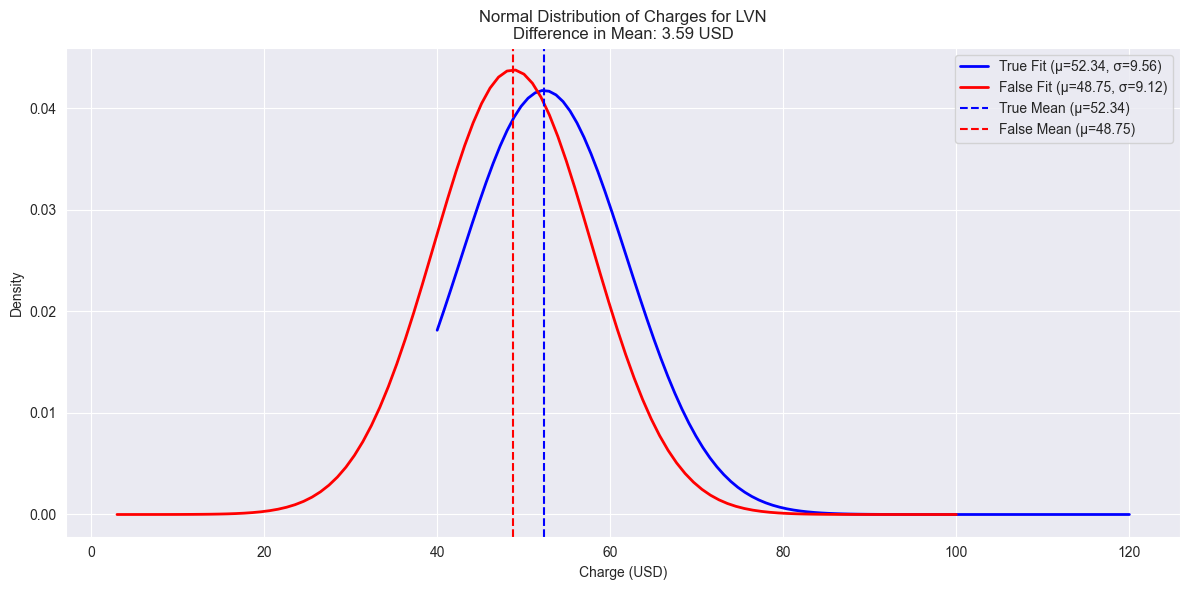

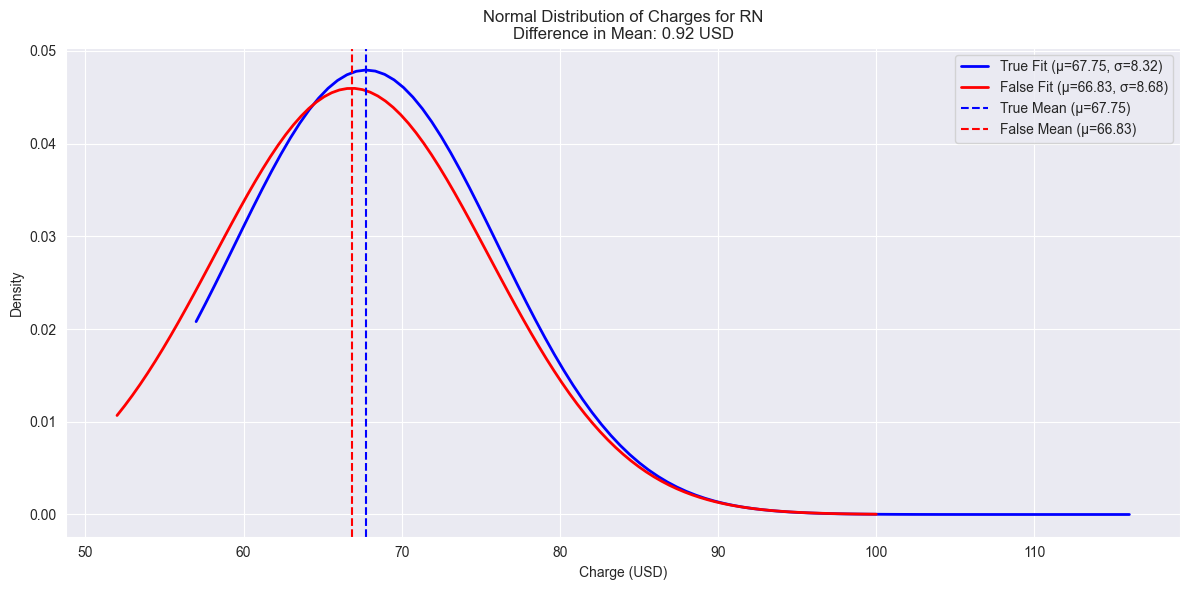

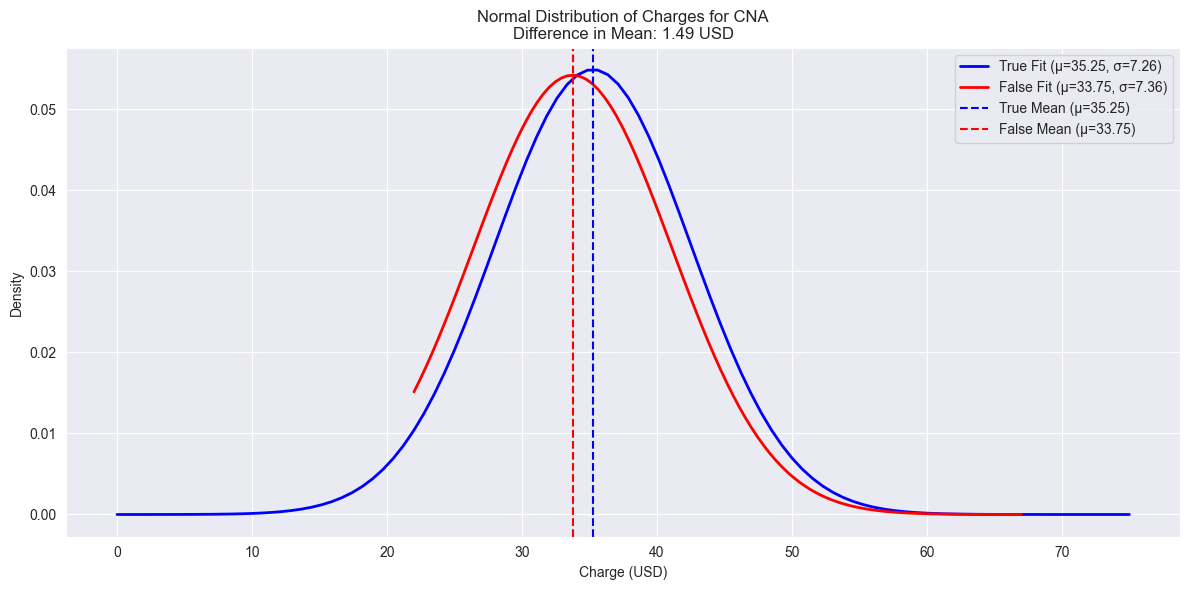

In [63]:
# Filter data for the specific 'Agent Req' categories
focus_categories = ['LVN', 'RN', 'CNA']

# Iterate over each category and plot
for category in focus_categories:
    # Filter data for Verified = False and Deleted = False for this category
    verified_false_filtered = shift_df[
        (shift_df['Verified'] == False) &
        (shift_df['Deleted'] == False) &
        (shift_df['Agent Req'] == category)
    ]['Charge'].dropna()

    # Filter data for Verified = True for this category
    verified_true_filtered = shift_df[
        (shift_df['Verified'] == True) &
        (shift_df['Agent Req'] == category)
    ]['Charge'].dropna()

    # Skip if there is no data for either case
    if verified_false_filtered.empty or verified_true_filtered.empty:
        print(f"No data for category: {category}")
        continue

    # Fit normal distributions
    mu_true, sigma_true = norm.fit(verified_true_filtered)
    mu_false, sigma_false = norm.fit(verified_false_filtered)

    # Generate x values for plotting
    x_true = np.linspace(verified_true_filtered.min(), verified_true_filtered.max(), 100)
    x_false = np.linspace(verified_false_filtered.min(), verified_false_filtered.max(), 100)

    # Generate normal distribution curves
    pdf_true = norm.pdf(x_true, mu_true, sigma_true)
    pdf_false = norm.pdf(x_false, mu_false, sigma_false)

    # Plot the histogram and normal distribution curves
    plt.figure(figsize=(12, 6))

    # Plot the normal distribution curves
    plt.plot(x_true, pdf_true, label=f'True Fit (μ={mu_true:.2f}, σ={sigma_true:.2f})', color='blue', linewidth=2)
    plt.plot(x_false, pdf_false, label=f'False Fit (μ={mu_false:.2f}, σ={sigma_false:.2f})', color='red', linewidth=2)

    # Add vertical lines for the means
    plt.axvline(mu_true, color='blue', linestyle='--', label=f'True Mean (μ={mu_true:.2f})', linewidth=1.5)
    plt.axvline(mu_false, color='red', linestyle='--', label=f'False Mean (μ={mu_false:.2f})', linewidth=1.5)

    # Customize the plot
    mean_difference = abs(mu_true - mu_false)
    plt.title(f'Normal Distribution of Charges for {category}\nDifference in Mean: {mean_difference:.2f} USD')
    plt.xlabel('Charge (USD)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [68]:
unique_HCP = shift_df['Worker ID'].dropna().unique()
unique_HCF = shift_df['Facility ID'].dropna().unique()

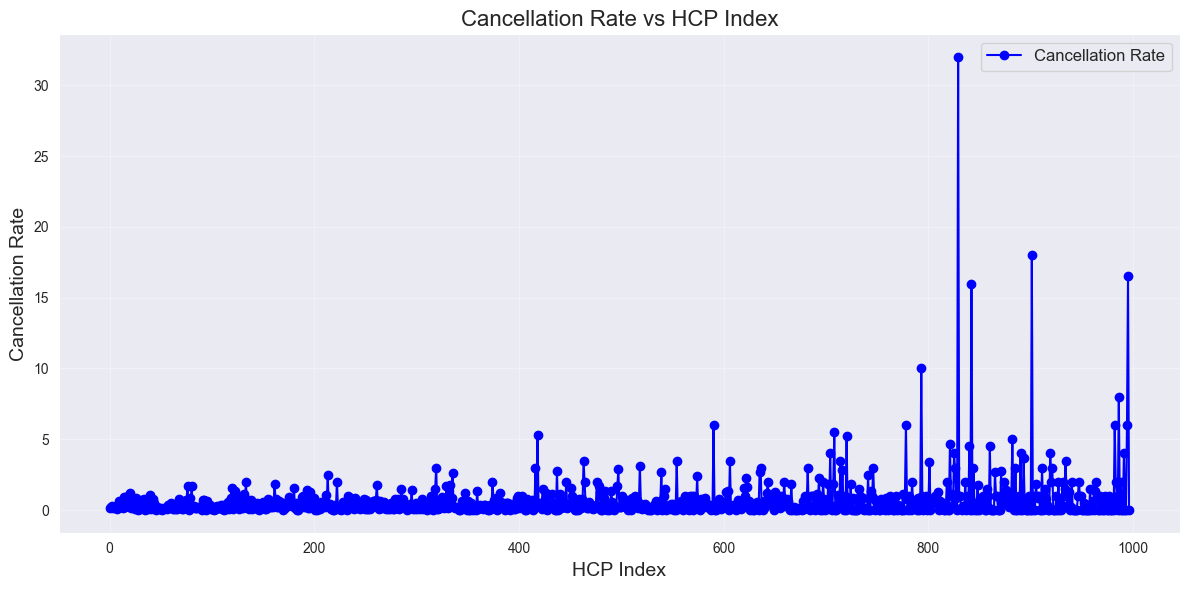

In [70]:
# Initialize results
results = []

# Iterate over unique HCP values
for hcp in unique_HCP:
    count = shift_df['Worker ID'].dropna().eq(hcp).sum()
    c_count = cancellation_df['Worker ID'].dropna().eq(hcp).sum()
    
    # Append data to results
    results.append({
        'HCP': hcp, 
        'Shift Count': count, 
        'Cancellation Count': c_count
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Protect against division by zero
results_df['Cancellation Rate'] = results_df.apply(
    lambda row: row['Cancellation Count'] / row['Shift Count'] if row['Shift Count'] > 0 else 0, axis=1
)

# Plot Cancellation Rate
plt.figure(figsize=(12, 6))

# Plot Cancellation Rate
plt.plot(results_df.index, results_df['Cancellation Rate'], label='Cancellation Rate', marker='o', color='blue')

# Add labels and title
plt.title('Cancellation Rate vs HCP Index', fontsize=16)
plt.xlabel('HCP Index', fontsize=14)
plt.ylabel('Cancellation Rate', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Add grid
plt.grid(alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()


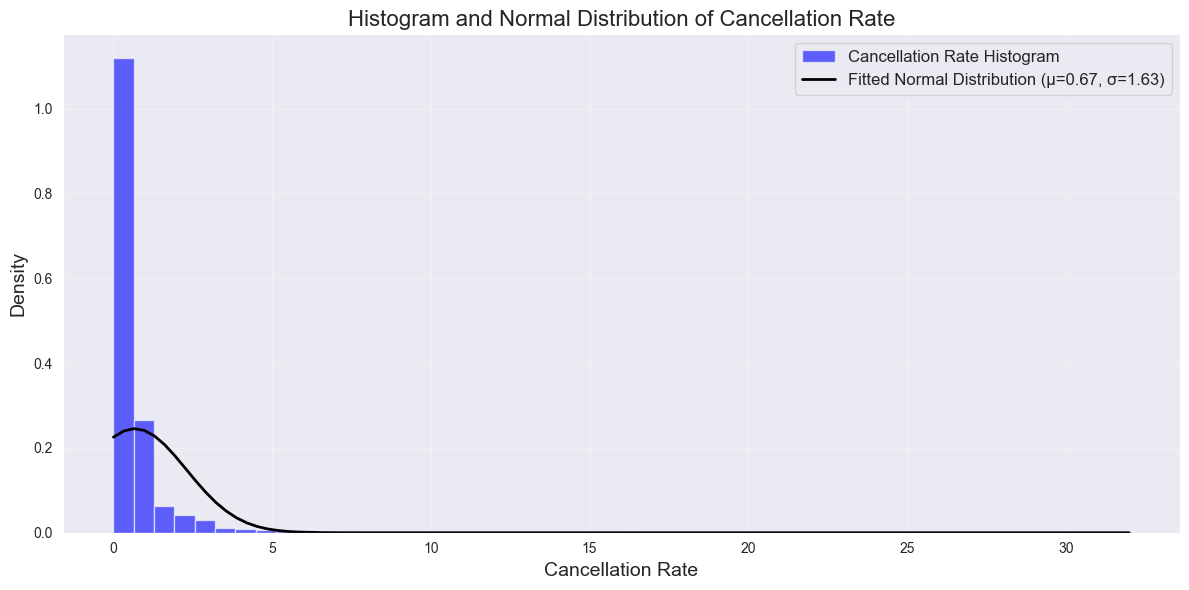

In [72]:
from scipy.stats import norm
import numpy as np

# Fit a normal distribution to the Cancellation Rate data
cancellation_rate_data = results_df['Cancellation Rate']
mu, sigma = norm.fit(cancellation_rate_data)

# Generate x values for plotting the fitted distribution
x = np.linspace(cancellation_rate_data.min(), cancellation_rate_data.max(), 100)
pdf = norm.pdf(x, mu, sigma)

# Plot the histogram and the fitted normal distribution
plt.figure(figsize=(12, 6))

# Histogram of the Cancellation Rate
plt.hist(cancellation_rate_data, bins=50, density=True, alpha=0.6, color='blue', label='Cancellation Rate Histogram')

# Fitted Normal Distribution
plt.plot(x, pdf, 'k', linewidth=2, label=f'Fitted Normal Distribution (μ={mu:.2f}, σ={sigma:.2f})')

# Customize the plot
plt.title('Histogram and Normal Distribution of Cancellation Rate', fontsize=16)
plt.xlabel('Cancellation Rate', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


Cancellation Rate Statistics


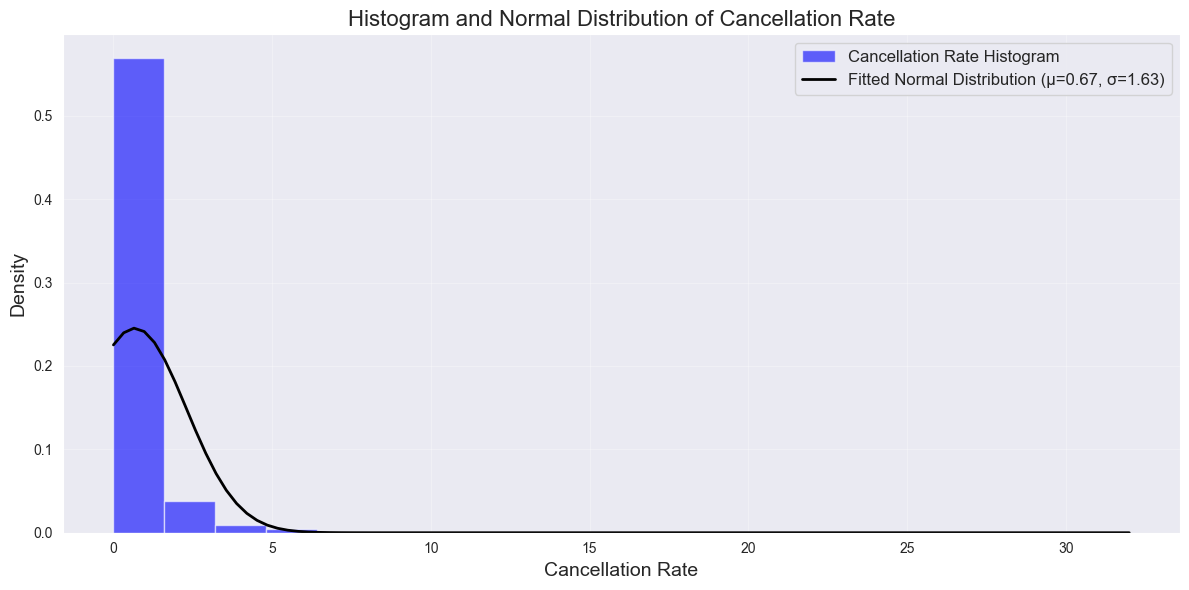

In [74]:
# Calculate percentiles for the Cancellation Rate data
percentiles = np.percentile(cancellation_rate_data, [5, 25, 50, 75, 95])

# Prepare percentile results
percentile_results = {
    "5th Percentile": percentiles[0],
    "25th Percentile": percentiles[1],
    "50th Percentile (Median)": percentiles[2],
    "75th Percentile": percentiles[3],
    "95th Percentile": percentiles[4],
    "Mean (μ)": mu,
    "Standard Deviation (σ)": sigma
}

# Display the results as a DataFrame
percentiles_df = pd.DataFrame([percentile_results])
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Cancellation Rate Statistics", dataframe=percentiles_df)

# Plot the histogram and the fitted normal distribution
plt.figure(figsize=(12, 6))

# Histogram of the Cancellation Rate
plt.hist(cancellation_rate_data, bins=20, density=True, alpha=0.6, color='blue', label='Cancellation Rate Histogram')

# Fitted Normal Distribution
plt.plot(x, pdf, 'k', linewidth=2, label=f'Fitted Normal Distribution (μ={mu:.2f}, σ={sigma:.2f})')

# Customize the plot
plt.title('Histogram and Normal Distribution of Cancellation Rate', fontsize=16)
plt.xlabel('Cancellation Rate', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


For a HCP is Cancellation rate > 2.5 we start taking action
{'5th Percentile': 0.0,
 '25th Percentile': 0.08771929824561403,
 '50th Percentile (Median)': 0.2857142857142857,
 '75th Percentile': 0.7407407407407407,
 '95th Percentile': 2.4076923076922996,
 'Mean (μ)': 0.6723601900701112,
 'Standard Deviation (σ)': 1.6257835552293631}

In [76]:
# Define the target 95th percentile and current 95th percentile
current_percentile_95 = 2.4076923076922996  # Current 95th percentile
target_percentile_95 = 2.0  # Target 95th percentile

# Calculate the scaling factor required to adjust the 95th percentile
scaling_factor = target_percentile_95 / current_percentile_95

# Apply the scaling factor to the current Cancellation Rate data
adjusted_cancellation_rate = cancellation_rate_data * scaling_factor

# Calculate the reduction in cancellation counts needed
# Reduction is proportional to the scaling factor applied
current_total_cancellations = results_df['Cancellation Count'].sum()
adjusted_total_cancellations = current_total_cancellations * scaling_factor
cancellation_reduction = current_total_cancellations - adjusted_total_cancellations

# Display the results
print(f"Current Total Cancellations: {current_total_cancellations}")
print(f"Adjusted Total Cancellations (Target): {adjusted_total_cancellations:.2f}")
print(f"Reduction in Cancellations Needed: {cancellation_reduction:.2f}")

Current Total Cancellations: 8179
Adjusted Total Cancellations (Target): 6794.06
Reduction in Cancellations Needed: 1384.94


In [127]:
results_df

,HCP,Shift Count,Cancellation Count,Cancellation Rate
0,614627661afb050166fecd99,84,10,0.119048
1,60d5f4c8a9b88a0166aedaca,31,7,0.225806
2,5d7fb6319b671100167be1f1,49,13,0.265306
3,613503b78b28c60166060efe,56,9,0.160714
4,6099c93f2a957601669549c3,156,39,0.250000
...,...,...,...,...
992,617599f35d4d7901692ca487,1,0,0.000000
993,619259b4b7c6fa0185e95436,1,0,0.000000
994,6172bbf49a55d10169c7d49d,1,6,6.000000
995,617531679bca06016ae5ffc2,2,33,16.500000


In [83]:
from scipy.stats import norm
offset = 1.04
# Initialize results for counts
false_counts_at_mean = []
false_counts_at_mean_plus_offset = []

# Iterate over each category
for category in focus_categories:
    # Filter data for Verified = False and Deleted = False for this category
    verified_false_filtered = shift_df[
        (shift_df['Verified'] == False) &
        (shift_df['Deleted'] == False) &
        (shift_df['Agent Req'] == category)
    ]['Charge'].dropna()

    # Skip if no data is available
    if verified_false_filtered.empty:
        print(f"No data for category: {category}")
        false_counts_at_mean.append({'Category': category, 'Count at Mean': 0})
        false_counts_at_mean_plus_offset.append({'Category': category, 'Count at Mean + Offset': 0})
        continue

    # Fit the normal distribution
    mu_false, sigma_false = norm.fit(verified_false_filtered)

    # Calculate counts at mean and mean + offset using the PDF of the distribution
    count_at_mean = norm.pdf(mu_false, mu_false, sigma_false) * len(verified_false_filtered)
    count_at_mean_plus_offset = norm.pdf(mu_false + offset, mu_false, sigma_false) * len(verified_false_filtered)

    # Store results
    false_counts_at_mean.append({'Category': category, 'Count at Mean': count_at_mean})
    false_counts_at_mean_plus_offset.append({'Category': category, 'Count at Mean + Offset': count_at_mean_plus_offset})

# Convert the results into DataFrames
counts_at_mean_df = pd.DataFrame(false_counts_at_mean)
counts_at_mean_plus_offset_df = pd.DataFrame(false_counts_at_mean_plus_offset)


In [84]:
counts_at_mean_df

,Category,Count at Mean
0,LVN,163.452560
1,RN,55.343713
2,CNA,249.985029


In [85]:
counts_at_mean_plus_offset_df

,Category,Count at Mean + Offset
0,LVN,162.392334
1,RN,54.947790
2,CNA,247.499671


In [138]:
from scipy.stats import norm

# Initialize results
jump_results = []

# Iterate over each category
for category in focus_categories:
    # Filter data for Verified = False
    false_filtered = shift_df[
        (shift_df['Verified'] == False) & (shift_df['Deleted'] == False) & (shift_df['Agent Req'] == category)
    ]['Charge'].dropna()

    # Skip if no data is available
    if false_filtered.empty:
        print(f"No data for category: {category}")
        jump_results.append({'Category': category, 'Jumpers': 0})
        continue

    # Fit the normal distribution to the "False" data
    mu_false, sigma_false = norm.fit(false_filtered)

    # Calculate probabilities between mu_false and mu_false + 1
    lower_bound = mu_false
    upper_bound = mu_false + 1.5
    jump_probability = norm.cdf(upper_bound, loc=mu_false, scale=sigma_false) - norm.cdf(lower_bound, loc=mu_false, scale=sigma_false)

    # Calculate the number of workers likely to jump
    total_false_workers = len(false_filtered)
    jumpers = jump_probability * total_false_workers

    # Store the results
    jump_results.append({'Category': category, 'Jumpers': jumpers})

# Convert results to a DataFrame
jump_results_df = pd.DataFrame(jump_results)




In [139]:
jump_results_df['Jumpers'].sum()

699.0767261881656

In [140]:
results_df['Cancellation Count'].sum()

8179

In [141]:
# Inputs: Current total cancellations and target total cancellations
current_total_cancellations = results_df['Cancellation Count'].sum()  # Example value for current total cancellations
target_total_cancellations = jump_results_df['Jumpers'].sum()   # Example value for target total cancellations

# Current 95th percentile
current_percentile_95 = 2.4076923076922996

# Calculate the scaling factor based on total cancellations
scaling_factor = 1- (target_total_cancellations / current_total_cancellations)

# Calculate the new 95th percentile
new_percentile_95 = current_percentile_95 * scaling_factor

# Calculate the percentage improvement
percent_improvement = (1-((current_total_cancellations - target_total_cancellations) / current_total_cancellations)) * 100

# Display the results
print(f"Current 95th Percentile: {current_percentile_95}")
print(f"Scaling Factor: {scaling_factor:.4f}")
print(f"New 95th Percentile: {new_percentile_95:.4f}")
print(f"Percentage Improvement in Total Cancellations: {percent_improvement:.2f}%")


Current 95th Percentile: 2.4076923076922996
Scaling Factor: 0.9145
New 95th Percentile: 2.2019
Percentage Improvement in Total Cancellations: 8.55%


In [144]:
from scipy.stats import norm
import pandas as pd

# Define function to calculate jumpers and updated metrics for different dollar increases
def calculate_jumpers_and_metrics(dollar_increase, focus_categories, shift_df, results_df, current_percentile_95):
    jump_results = []

    # Iterate over each category
    for category in focus_categories:
        # Filter data for Verified = False
        false_filtered = shift_df[
            (shift_df['Verified'] == False) &
            (shift_df['Deleted'] == False) &
            (shift_df['Agent Req'] == category)
        ]['Charge'].dropna()

        # Skip if no data is available
        if false_filtered.empty:
            jump_results.append({'Category': category, 'Jumpers': 0})
            continue

        # Fit the normal distribution to the "False" data
        mu_false, sigma_false = norm.fit(false_filtered)

        # Calculate probabilities between mu_false and mu_false + dollar increase
        lower_bound = mu_false
        upper_bound = mu_false + dollar_increase
        jump_probability = norm.cdf(upper_bound, loc=mu_false, scale=sigma_false) - norm.cdf(lower_bound, loc=mu_false, scale=sigma_false)

        # Calculate the number of workers likely to jump
        total_false_workers = len(false_filtered)
        jumpers = jump_probability * total_false_workers

        # Store the results
        jump_results.append({'Category': category, 'Jumpers': jumpers})

    # Convert results to a DataFrame
    jump_results_df = pd.DataFrame(jump_results)

    # Calculate metrics
    current_total_cancellations = results_df['Cancellation Count'].sum()
    target_total_cancellations = jump_results_df['Jumpers'].sum()
    scaling_factor = 1 - (target_total_cancellations / current_total_cancellations)
    new_percentile_95 = current_percentile_95 * scaling_factor
    percent_improvement = (1- ((current_total_cancellations - target_total_cancellations) / current_total_cancellations)) * 100

    return {
        "Dollar Increase": dollar_increase,
        "Current Total Cancellations": current_total_cancellations,
        "Target Total Cancellations": target_total_cancellations,
        "New 95th Percentile": new_percentile_95,
        "Percentage Improvement": percent_improvement
    }

# Example inputs
focus_categories = ['LVN', 'RN', 'CNA']  # Example focus categories
current_percentile_95 = 2.4076923076922996  # Example current 95th percentile

# Iterate over dollar increases
results = []
for dollar_increase in [0.5, 1.0, 1.5]:
    metrics = calculate_jumpers_and_metrics(dollar_increase, focus_categories, shift_df, results_df, current_percentile_95)
    results.append(metrics)

# Convert to DataFrame for visualization
results_table = pd.DataFrame(results)




In [145]:
results_table


,Dollar Increase,Current Total Cancellations,Target Total Cancellations,New 95th Percentile,Percentage Improvement
0,0.5,8179,234.238237,2.338738,2.863898
1,1.0,8179,467.564214,2.270053,5.716643
2,1.5,8179,699.076726,2.201902,8.547215


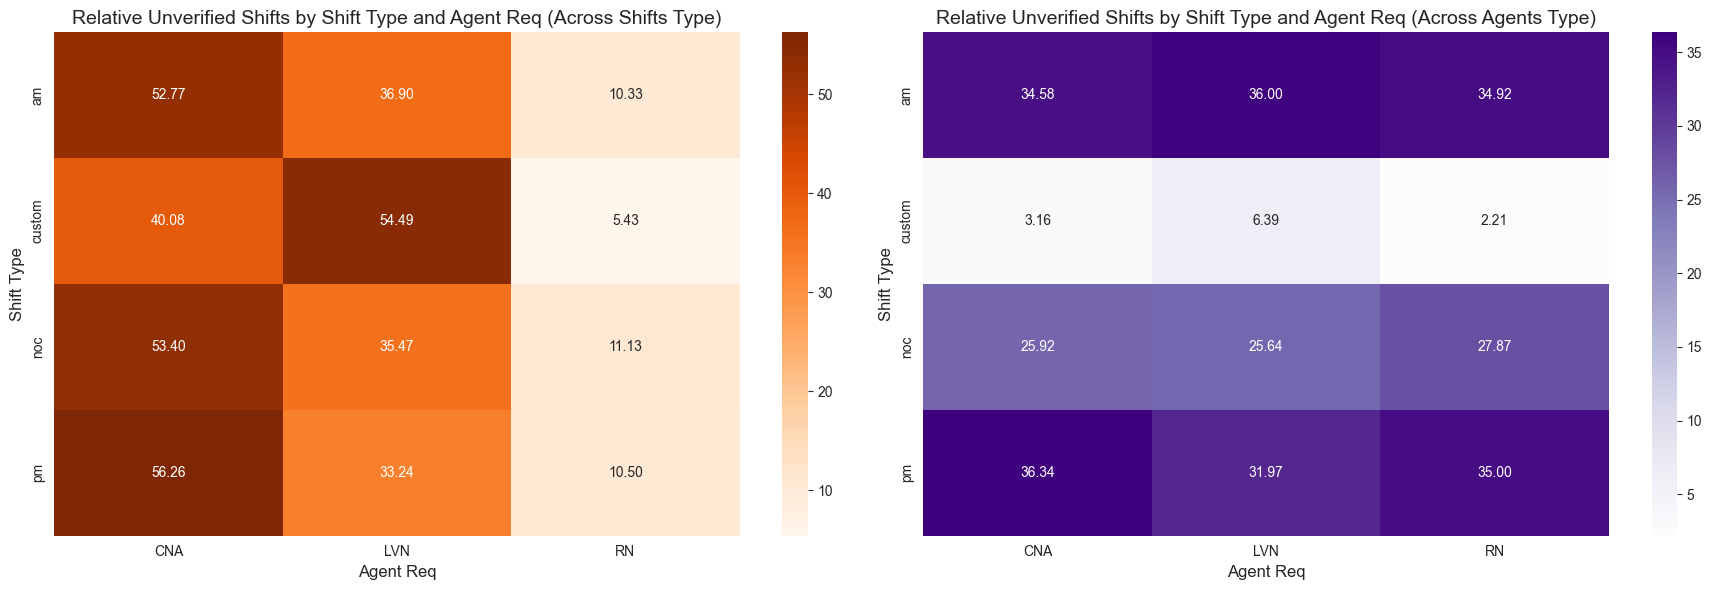

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data to include only relevant `Agent Req` values and Verified == False
filtered_shift_df = shift_df[
    (shift_df['Agent Req'].isin(['LVN', 'RN', 'CNA'])) &
    (shift_df['Verified'] == False)
]

filtered_shift_2_df = shift_df[
    (shift_df['Agent Req'].isin(['LVN', 'RN', 'CNA']))
]

# Group data to calculate total unverified shifts by Shift Type and Agent Req
grouped_totals = filtered_shift_df.groupby(['Shift Type', 'Agent Req']).size().reset_index(name='Unverified Shifts')

# Group data to calculate total unverified shifts by Shift Type and Agent Req
grouped_totals_2 = filtered_shift_2_df.groupby(['Shift Type', 'Agent Req']).size().reset_index(name='Shifts')


# Calculate total unverified shifts per shift type for relative measure
total_unverified_per_shift = grouped_totals.groupby('Shift Type')['Unverified Shifts'].sum().reset_index(name='Total Unverified per Shift')

# Merge total unverified shifts per shift type
merged_data = pd.merge(grouped_totals, total_unverified_per_shift, on='Shift Type', how='left')

# Calculate relative unverified shifts (proportion in each shift type)
merged_data['Relative Unverified'] = (merged_data['Unverified Shifts'] / merged_data['Total Unverified per Shift']) * 100

# Calculate total unverified shifts per Agent Req for column-wise percentage
total_unverified_per_agent = merged_data.groupby('Agent Req')['Unverified Shifts'].sum().reset_index(name='Total Unverified per Agent Req')

# Merge total unverified shifts per Agent Req
merged_data = pd.merge(merged_data, total_unverified_per_agent, on='Agent Req', how='left')

# Calculate column-wise percentage unverified shifts
merged_data['Column-Wise Pct'] = (merged_data['Unverified Shifts'] / merged_data['Total Unverified per Agent Req']) * 100

# Pivot data for heatmaps
pivot_data = merged_data.pivot_table(
    values='Unverified Shifts',
    index='Shift Type',
    columns='Agent Req',
    aggfunc='sum',
    fill_value=0
)

pivot_relative_data = merged_data.pivot_table(
    values='Relative Unverified',
    index='Shift Type',
    columns='Agent Req',
    aggfunc='sum',
    fill_value=0
)

pivot_column_data = merged_data.pivot_table(
    values='Column-Wise Pct',
    index='Shift Type',
    columns='Agent Req',
    aggfunc='sum',
    fill_value=0
)

# Plot the heatmaps
plt.figure(figsize=(18, 6))

# Heatmap for relative unverified shifts
plt.subplot(1, 2, 1)
sns.heatmap(pivot_relative_data, annot=True, fmt=".2f", cmap='Oranges', cbar=True)
plt.title('Relative Unverified Shifts by Shift Type and Agent Req (Across Shifts Type)', fontsize=14)
plt.xlabel('Agent Req', fontsize=12)
plt.ylabel('Shift Type', fontsize=12)

# Heatmap for column-wise percentage unverified shifts
plt.subplot(1, 2, 2)
sns.heatmap(pivot_column_data, annot=True, fmt=".2f", cmap='Purples', cbar=True)
plt.title('Relative Unverified Shifts by Shift Type and Agent Req (Across Agents Type)', fontsize=14)
plt.xlabel('Agent Req', fontsize=12)
plt.ylabel('Shift Type', fontsize=12)

plt.tight_layout()
plt.show()
